In [2]:
import matplotlib.pyplot as plt
from script.sahr_fin_flutter import calculate_flutter_velocity as sahr_cfv, list_of_flutter_velocities
import numpy as np
import pandas as pd
from script.howard_fin_flutter import calculate_flutter_velocity as howard_cfv
import sys
sys.path.append("..")  # Adds the parent directory to the system pat

# Manual


In [24]:
altitude = 3048  # in m
shear_modulus = 5000000000  # in Pa
thickness = 4  # in mm
root_chord = 300  # in inches
tip_chord = 100  # in mm
semispan = 140  # in mm
sea_level_sound = 340  # in m/s
sea_level_pressure = 101325  # in Pa
atmospheric_scale_height = 8077  # ft
thickness_increments = 0.01
maximum_thickness = 5
minimum_thickness = 0

# Howard Flutter Velocity


In [25]:
howard_cfv(altitude, shear_modulus, thickness, root_chord, tip_chord, semispan)

98544.68490202814

# Sahr Flutter Velocity


In [26]:
sahr_cfv(sea_level_sound, altitude, atmospheric_scale_height, shear_modulus,
         sea_level_pressure, thickness, root_chord, tip_chord, semispan)

401.84737525224915

In [28]:
lofv = list_of_flutter_velocities(minimum_thickness, maximum_thickness, thickness_increments, sea_level_sound, altitude,
                                  atmospheric_scale_height, shear_modulus, sea_level_pressure, root_chord, tip_chord, semispan)

In [30]:
# Create array of thickness values
thicknesses = np.arange(
    minimum_thickness, maximum_thickness + thickness_increments, thickness_increments)

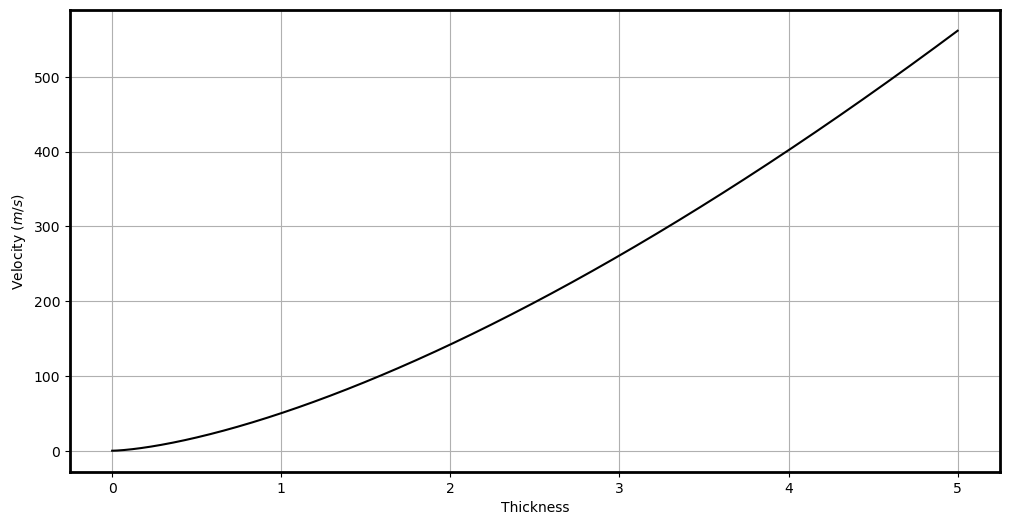

In [31]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel(r"Thickness")
ax1.set_ylabel(r"Velocity ($m/s$)")
ax1.grid(True)
ax1.plot(thicknesses,
         lofv, color='k', label="Flutter")
# ax1.set_ylim(min_drag_rounded, max_drag_rounded)
# ax1.set_xlim(0, max_mach)

# Change spine properties to make the border darker and thicker
for spine in ax1.spines.values():
    spine.set_edgecolor('black')  # Change color to black or any other color
    # Change the thickness. Adjust the value as needed.
    spine.set_linewidth(2)

# ax1.set_yticks(np.arange(0, max_drag+0.1, 0.05))

# Plot event markers
# self.plot_event_markers_mach(ax1)

plt.show()